In [12]:
#Importing relavant libraries
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.graphics.tsaplots as sgt
from arch import arch_model
import seaborn as sns
import yfinance
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [2]:
raw_csv_data = pd.read_csv('GOOG1.csv')
df_comp = raw_csv_data.copy()
#Converting Time
df_comp.Date = pd.to_datetime(df_comp.Date, dayfirst=True)
#Setting Date as an index
df_comp.set_index('Date', inplace=True)
#Setting Frequency as business working days
df_comp = df_comp.asfreq('b')
#Filling the Missing or Empty Values
df_comp = df_comp.fillna(method='ffill')
df_comp['market_value'] = df_comp.Close

In [3]:
del df_comp['Open']
del df_comp['High']
del df_comp['Low']
del df_comp['Adj Close']
del df_comp['Volume']

In [4]:
size = int(len(df_comp) * 0.8)
df, df_test = df_comp[:size], df_comp[size:]

In [5]:
df['returns'] = df.market_value.pct_change(1)*100

In [7]:
df['sq_returns'] = df.returns.mul(df.returns)

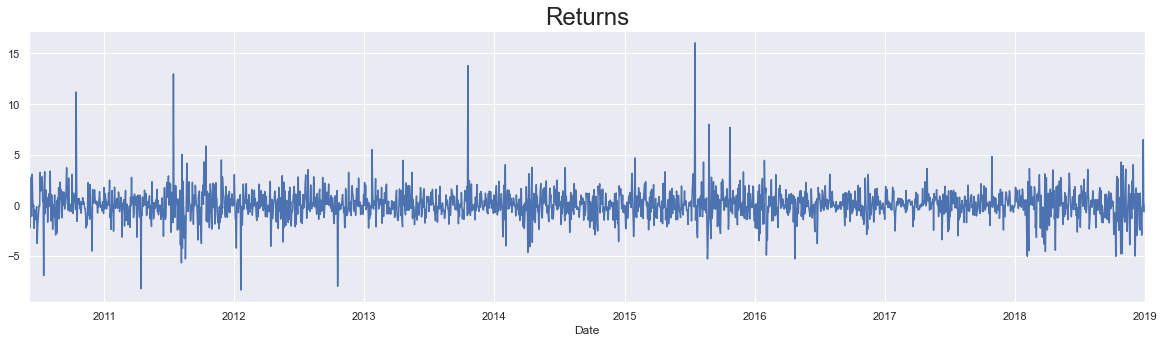

In [9]:
#Returns Vs Squared Returns
df.returns.plot(figsize = (20,5))
plt.title('Returns', size = 24)
plt.show()

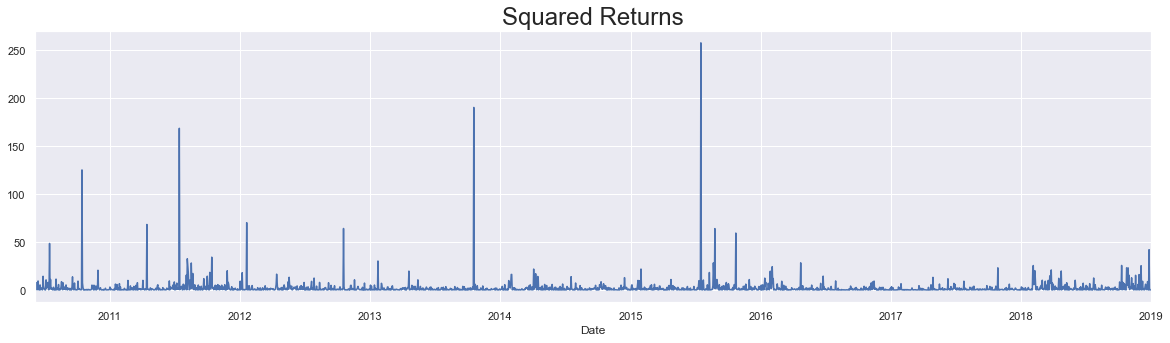

In [10]:
#Returns Vs Squared Returns
df.sq_returns.plot(figsize = (20,5))
plt.title('Squared Returns', size = 24)
plt.show()

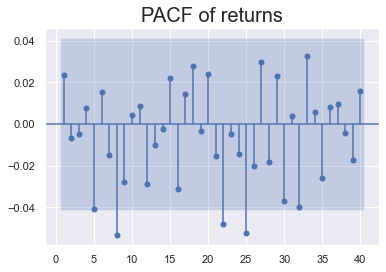

In [13]:
#PACF
sgt.plot_pacf(df.returns[1:], lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title('PACF of returns', size = 20)
plt.show()

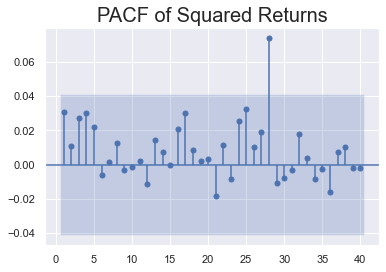

In [14]:
#PACF
sgt.plot_pacf(df.sq_returns[1:], lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title('PACF of Squared Returns', size = 20)
plt.show()

In [15]:
#ARCH Model
from arch import arch_model

In [18]:
model_arch_1 = arch_model(df.returns[1:])
results_arch_1 = model_arch_1.fit()
results_arch_1.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 13053.279234983365
Iteration:      2,   Func. Count:     15,   Neg. LLF: 4813.928867317216
Iteration:      3,   Func. Count:     22,   Neg. LLF: 6749.599007641017
Iteration:      4,   Func. Count:     30,   Neg. LLF: 4056.7315221705326
Iteration:      5,   Func. Count:     37,   Neg. LLF: 4023.606089788375
Iteration:      6,   Func. Count:     42,   Neg. LLF: 4023.594390571077
Iteration:      7,   Func. Count:     47,   Neg. LLF: 4023.5932658713978
Iteration:      8,   Func. Count:     52,   Neg. LLF: 4023.5930916156303
Iteration:      9,   Func. Count:     57,   Neg. LLF: 4023.5930881097147
Iteration:     10,   Func. Count:     61,   Neg. LLF: 4023.5930881093245
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4023.5930881097147
            Iterations: 10
            Function evaluations: 61
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4023.59
Distribution:                  Normal   AIC:                           8055.19
Method:            Maximum Likelihood   BIC:                           8078.04
                                        No. Observations:                 2236
Date:                Thu, Apr 01 2021   Df Residuals:                     2235
Time:                        21:08:21   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0747  3.114e-02      2.398  1.647e-02 [1.365e-02,  0.136]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.2998      0.257      1.166      0.243    [ -0.204,  0.804]
alpha[1]       0.1263  8.032e-02      1.572      0.116 [-3.117e-02,  0.284]
beta[1]        0.7570      0.160      4.735  2.189e-06    [  0.444,  1.070]
===========================================================================

Covariance estimator: robust
"""

In [19]:
model_arch_2 = arch_model(df.returns[1:], mean = 'constant', vol = 'ARCH', p = 1)
results_arch_2 = model_arch_2.fit(update_freq = 5)
results_arch_2.summary()

Iteration:      5,   Func. Count:     29,   Neg. LLF: 4047.1868270106966
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4047.1868270106966
            Iterations: 6
            Function evaluations: 32
            Gradient evaluations: 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -4047.19
Distribution:                  Normal   AIC:                           8100.37
Method:            Maximum Likelihood   BIC:                           8117.51
                                        No. Observations:                 2236
Date:                Thu, Apr 01 2021   Df Residuals:                     2235
Time:                        21:10:47   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0944  4.036e-02      2.339  1.932e-02 [1.531e-02,  0.174]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          1.8204      0.177     10.257  1.099e-24    [  1.473,  2.168]
alpha[1]       0.2470      0.134      1.842  6.544e-02 [-1.579e-02,  0.510]
===========================================================================

Covariance estimator: robust
"""

In [22]:
model_arch_3 = arch_model(df.returns[1:], mean = 'constant', vol = 'ARCH', p = 2)
results_arch_3 = model_arch_3.fit(update_freq = 5)
results_arch_3.summary()

Iteration:      5,   Func. Count:     34,   Neg. LLF: 4069.254859761988
Iteration:     10,   Func. Count:     60,   Neg. LLF: 4041.8321074029473
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4041.8321074029323
            Iterations: 10
            Function evaluations: 60
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -4041.83
Distribution:                  Normal   AIC:                           8091.66
Method:            Maximum Likelihood   BIC:                           8114.51
                                        No. Observations:                 2236
Date:                Thu, Apr 01 2021   Df Residuals:                     2235
Time:                        21:31:32   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0868  3.854e-02      2.252  2.429e-02 [1.127e-02,  0.162]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          1.7045      0.188      9.059  1.317e-19    [  1.336,  2.073]
alpha[1]       0.2311      0.138      1.677  9.358e-02 [-3.903e-02,  0.501]
alpha[2]       0.0724  5.311e-02      1.363      0.173 [-3.169e-02,  0.177]
===========================================================================

Covariance estimator: robust
"""

In [23]:
model_arch_1_zero = arch_model(df.returns[1:], mean = 'zero', vol = 'ARCH', p = 1)
results_arch_1_zero = model_arch_1_zero.fit(update_freq = 5)
results_arch_1_zero.summary()

Iteration:      5,   Func. Count:     20,   Neg. LLF: 4052.006396314236
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4052.006396314259
            Iterations: 5
            Function evaluations: 20
            Gradient evaluations: 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Zero Mean - ARCH Model Results                        
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -4052.01
Distribution:                  Normal   AIC:                           8108.01
Method:            Maximum Likelihood   BIC:                           8119.44
                                        No. Observations:                 2236
Date:                Thu, Apr 01 2021   Df Residuals:                     2236
Time:                        21:36:50   Df Model:                            0
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          1.8478      0.182     10.156  3.108e-24    [  1.491,  2.204]
alpha[1]       0.2309      0.126      1.832  6.692e-02 [-1.610e-02,  0.478]
===========================================================================

Covariance estimator: robust
"""

In [24]:
model_arch_2_zero = arch_model(df.returns[1:], mean = 'zero', vol = 'ARCH', p = 2)
results_arch_2_zero = model_arch_2_zero.fit(update_freq = 5)
results_arch_2_zero.summary()

Iteration:      5,   Func. Count:     27,   Neg. LLF: 4045.909795902259
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4045.905360391721
            Iterations: 9
            Function evaluations: 42
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Zero Mean - ARCH Model Results                        
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -4045.91
Distribution:                  Normal   AIC:                           8097.81
Method:            Maximum Likelihood   BIC:                           8114.95
                                        No. Observations:                 2236
Date:                Thu, Apr 01 2021   Df Residuals:                     2236
Time:                        21:38:29   Df Model:                            0
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          1.7134      0.190      9.024  1.811e-19    [  1.341,  2.086]
alpha[1]       0.2183      0.131      1.669  9.502e-02 [-3.798e-02,  0.475]
alpha[2]       0.0808  5.787e-02      1.396      0.163 [-3.263e-02,  0.194]
===========================================================================

Covariance estimator: robust
"""

In [25]:
model_arch_1_ar = arch_model(df.returns[1:], mean = 'AR', vol = 'ARCH', p = 1)
results_arch_1_ar = model_arch_1_ar.fit(update_freq = 5)
results_arch_1_ar.summary()

Iteration:      5,   Func. Count:     29,   Neg. LLF: 4047.1868270106966
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4047.1868270106966
            Iterations: 6
            Function evaluations: 32
            Gradient evaluations: 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - ARCH Model Results                            
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:                        AR   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -4047.19
Distribution:                  Normal   AIC:                           8100.37
Method:            Maximum Likelihood   BIC:                           8117.51
                                        No. Observations:                 2236
Date:                Thu, Apr 01 2021   Df Residuals:                     2235
Time:                        21:40:54   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
Const          0.0944  4.036e-02      2.339  1.932e-02 [1.531e-02,  0.174]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          1.8204      0.177     10.257  1.099e-24    [  1.473,  2.168]
alpha[1]       0.2470      0.134      1.842  6.544e-02 [-1.579e-02,  0.510]
===========================================================================

Covariance estimator: robust
"""

In [26]:
model_arch_2_ar = arch_model(df.returns[1:], mean = 'AR', vol = 'ARCH', p = 2)
results_arch_2_ar = model_arch_2_ar.fit(update_freq = 5)
results_arch_2_ar.summary()

Iteration:      5,   Func. Count:     34,   Neg. LLF: 4069.254859761988
Iteration:     10,   Func. Count:     60,   Neg. LLF: 4041.8321074029473
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4041.8321074029323
            Iterations: 10
            Function evaluations: 60
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - ARCH Model Results                            
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:                        AR   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -4041.83
Distribution:                  Normal   AIC:                           8091.66
Method:            Maximum Likelihood   BIC:                           8114.51
                                        No. Observations:                 2236
Date:                Thu, Apr 01 2021   Df Residuals:                     2235
Time:                        21:43:24   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
Const          0.0868  3.854e-02      2.252  2.429e-02 [1.127e-02,  0.162]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          1.7045      0.188      9.059  1.317e-19    [  1.336,  2.073]
alpha[1]       0.2311      0.138      1.677  9.358e-02 [-3.903e-02,  0.501]
alpha[2]       0.0724  5.311e-02      1.363      0.173 [-3.169e-02,  0.177]
===========================================================================

Covariance estimator: robust
"""

In [27]:
model_arch_3_ar = arch_model(df.returns[1:], mean = 'AR', vol = 'ARCH', p = 3)
results_arch_3_ar = model_arch_3_ar.fit(update_freq = 5)
results_arch_3_ar.summary()

Iteration:      5,   Func. Count:     39,   Neg. LLF: 4031.1102701787054
Iteration:     10,   Func. Count:     71,   Neg. LLF: 4029.0444968296015
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4029.0444968295847
            Iterations: 10
            Function evaluations: 71
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - ARCH Model Results                            
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:                        AR   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -4029.04
Distribution:                  Normal   AIC:                           8068.09
Method:            Maximum Likelihood   BIC:                           8096.65
                                        No. Observations:                 2236
Date:                Thu, Apr 01 2021   Df Residuals:                     2235
Time:                        21:45:51   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
Const          0.0811  3.750e-02      2.162  3.062e-02 [7.573e-03,  0.155]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          1.5565      0.219      7.092  1.321e-12    [  1.126,  1.987]
alpha[1]       0.1780      0.125      1.419      0.156 [-6.793e-02,  0.424]
alpha[2]       0.0417  5.054e-02      0.825      0.409 [-5.734e-02,  0.141]
alpha[3]       0.1548  9.079e-02      1.705  8.828e-02 [-2.319e-02,  0.333]
===========================================================================

Covariance estimator: robust
"""

In [28]:
model_arch_3_zero = arch_model(df.returns[1:], mean = 'zero', vol = 'ARCH', p = 3)
results_arch_3_zero = model_arch_3_zero.fit(update_freq = 5)
results_arch_3_zero.summary()

Iteration:      5,   Func. Count:     32,   Neg. LLF: 4108.015447616433
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4032.641240989325
            Iterations: 9
            Function evaluations: 53
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Zero Mean - ARCH Model Results                        
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -4032.64
Distribution:                  Normal   AIC:                           8073.28
Method:            Maximum Likelihood   BIC:                           8096.13
                                        No. Observations:                 2236
Date:                Thu, Apr 01 2021   Df Residuals:                     2236
Time:                        21:48:00   Df Model:                            0
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          1.5614      0.220      7.101  1.237e-12    [  1.130,  1.992]
alpha[1]       0.1572      0.111      1.417      0.156 [-6.020e-02,  0.375]
alpha[2]       0.0476  5.643e-02      0.843      0.399 [-6.301e-02,  0.158]
alpha[3]       0.1677  9.477e-02      1.769  7.684e-02 [-1.806e-02,  0.353]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
model_arch_3_zero = arch_model(df.returns[1:], mean = 'zero', vol = 'ARCH', p = 3)
results_arch_3_zero = model_arch_3_zero.fit(update_freq = 5)
results_arch_3_zero.summary()